## Bayesian mixture

# Intuition

**FIGURE PLACEHOLDER:** ![Bayesian mixture](image_placeholder)

# Notation


## Mixture

A mixture model is a statistical model that represents the data as coming from a mixture of two or more underlying distributions. These models are particularly useful when the data may be generated by different processes or subgroups, but we don't have direct information about which subgroup each data point belongs to. In a mixture model, we assume that the observed data are generated from a weighted sum of these different distributions, where each distribution corresponds to a different "component" in the mixture. The probability density function (PDF) of a mixture model can be written as:

$$
f(y_i) = \sum_{k=1}^{K} \pi_k f_k(y_i)
$$

Where:
- $f(y_i)$ is the overall probability density function of the data point $y_i$.
- $K$ is the number of components (distributions) in the mixture (e.g., two populations in our height example).
- $\pi_k$ is the **mixture weight** for the $k$-th component, which represents the proportion of data points from that component in the total population. These weights satisfy the condition:

$$
\sum_{k=1}^{K} \pi_k = 1
$$

- $f_k(y_i)$ is the probability density function of the $k$-th component distribution, which can be any distribution, such as normal, exponential, etc.

In the case of a **mixture of normal distributions**, the individual components can be described by normal distributions with means $\mu_k$ and variances $\sigma_k^2$. The overall mixture density is then:

$$
f(y_i) = \sum_{k=1}^{K} \pi_k \mathcal{N}(y_i | \mu_k, \sigma_k^2)
$$

Where:
- $\mathcal{N}(y_i | \mu_k, \sigma_k^2)$ is the probability density function of the normal distribution for the $k$-th component, with mean $\mu_k$ and variance $\sigma_k^2$.


# Example

## Description

In this example, we are assuming a genetic variant that has an **additive effect** on the height of individuals. People are diploid, meaning they have two copies of each gene, and the genotype is coded as 0, 1, or 2, where:

- $x_i=0$ represents homozygous for the major allele
- $x_i=1$ represents heterozygous (one major and one minor allele)
- $x_i=2$ represents homozygous for the minor allele

The **minor allele frequency (MAF)** is 0.3, meaning 9% of the population carries two minor alleles, 42% carries only one minor allele, and 49% carries both major allele.

Each group is assumed to follow a **normal distribution** with a standard deviation of 1, but with different means based on the number of minor alleles. The proportions of individuals in each group are given as follows:

- **Genotype 00**: 49% of the population
- **Genotype 01**: 42% of the population
- **Genotype 11**: 9% of the population



### The Assumptions

We assume that the genetic variant **increases height** by 2 cm for each **minor allele**. This is an **additive effect**, so:

- Individuals with genotype 00 (no minor alleles) have a mean height of 170 cm.
- Individuals with genotype 01 (one minor allele) have a mean height of 172 cm.
- Individuals with genotype 11 (two minor alleles) have a mean height of 174 cm.

Thus, the mean height for each genotype group is determined by the equation:

$$ y_i \sim \mathcal{N}(170 + 2x_i, \sigma^2) $$

where $x_i$ is the number of minor alleles, and $\sigma^2$ is the variance (standard deviation squared), assumed to be 1 for all genotype groups.


These proportions reflect the distribution of genotypes in the population. 

We combine these individual genotype distributions to create a **mixture distribution**. The resulting distribution reflects the **overall distribution of height in the population**, considering the genotypic frequencies and the additive effect of the minor allele.



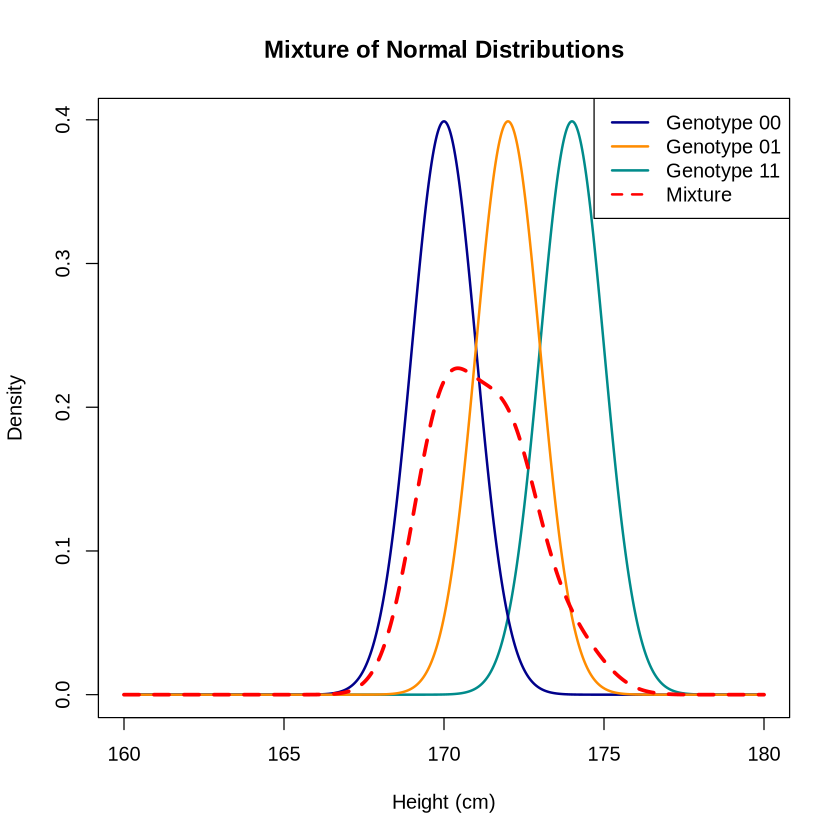

In [6]:
# Set the parameters
mu_0 <- 170  # Base mean height for genotype 00
theta <- 2   # Effect size for each minor allele (x_i)
sigma <- 1   # Standard deviation for all genotype groups

# Genotype codes: 00, 01, 11
genotypes <- c(0, 1, 2)

# Proportions for each genotype group
proportions <- c(0.49, 0.42, 0.09)

# Create x-values for plotting the distributions
x_values <- seq(160, 180, length.out = 1000)

# Calculate the PDFs for each genotype group
pdf_pop00 <- dnorm(x_values, mean = mu_0, sd = sigma)
pdf_pop01 <- dnorm(x_values, mean = mu_0 + theta, sd = sigma)
pdf_pop11 <- dnorm(x_values, mean = mu_0 + 2 * theta, sd = sigma)

# Calculate the mixture of the three distributions
pdf_mixture <- proportions[1] * pdf_pop00 + proportions[2] * pdf_pop01 + proportions[3] * pdf_pop11

# Find the maximum value of the PDFs to adjust the y-axis limits
y_max <- max(c(pdf_pop00, pdf_pop01, pdf_pop11, pdf_mixture))

# Plot the PDFs for Population 00, 01, and 11 with the mixture
plot(x_values, pdf_pop11, type = "l", col = "darkcyan", lwd = 2,
     xlab = "Height (cm)", ylab = "Density", main = "Mixture of Normal Distributions", ylim = c(0, y_max))

lines(x_values, pdf_pop00, col = "darkblue", lwd = 2)
lines(x_values, pdf_pop01, col = "darkorange", lwd = 2)

lines(x_values, pdf_mixture, col = "red", lwd = 3, lty = 2)  # Dashed line for the mixture

# Add a legend
legend("topright", legend = c("Genotype 00", "Genotype 01", "Genotype 11", "Mixture"),
       col = c("darkblue", "darkorange", "darkcyan", "red"), lwd = 2, lty = c(1, 1, 1, 2))


This plot illustrates how the height distribution in a population is affected by genetic variation and how the mixture of the three genotype groups leads to a population-wide distribution of height.
